#  課題　ボストン住宅価格　線形回帰

## 線形回帰とは何か？
- 線形回帰とは何か。
- 具体的に言うと？
- 分類と何か違うのか。

### 線形回帰とは何か
回帰とは、関数をデータに当てはめることによって、ある変数yの変動を別の変数xの変動により説明・予測・影響関係を検討するための手法です。
説明したい変数yを目的変数、それを予測するための変数xを説明変数とよびます。
関係式を要約して線を当てはめるのが線形回帰と言います。

### 具体的に言うと
具体的には、単回帰は、説明変数が１つの回帰モデルです。
説明変数が１つなので、y=ax+bのグラフの形、つまり線形の関係を仮定して目的変数を予測します。
グラフの形から、線形単回帰分析ともよばれます。

単回帰分析だけでは因果関係の特定はできませんが、その推論の手がかりにはなります。
なお、「回帰」という言葉は、英国の遺伝学者であり統計学者でもあったゴールトンの「平均への回帰」という概念が語源となっています。
### 分類と何か違うのか
回帰は、注文予測、株価分析のように、連続するデータの予測を行うときなどに使います。
主に数値を扱うときと考えておいて差し支えないかと思います
例えば、そのデータの特徴量の傾向をみて(座標上に線を書いて)、具体的な数字を出す（線上から割り出す）、予測するのが回帰でです。
一方で、分類は、回帰とは違い具体的な数字を出すのではなく、与えられたクラスに分ける（ラベリングする）ことを目的としています。
例えば、花弁の数をみて、少ないとパンジー、多いとたんぽぽのように、あらかじめ与えられたクラス（ここでは、パンジーとたんぽぽ）に分けることを分類といます。



## データ取得


In [185]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from pandas import Series,DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

%matplotlib inline

### ボストンデータを読み込みます

In [186]:
# 説明変数がload_boston().dataで、目的変数は、load_boston().targetより取得できるらしい

boston = load_boston()

In [187]:
print(boston)

{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), 'target': array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.

### 特徴量の意味ファイルも読み込みます

In [188]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### データフレーム化：説明変数

In [189]:
print(boston.data)
print(boston.feature_names)

#データフレームの引数にboston.dataを入れます
boston_df = DataFrame(boston.data)

#カラムにboston.feature_namesを指定します。
boston_df.columns = boston.feature_names

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


###   データフレーム化：目的変数

In [190]:
#データフレームの引数にboston.targetを入れます
boston_tg = pd.DataFrame(boston.target, columns = ['target'])

In [191]:
boston_tg.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### CSVにしておきましょう（メモリに優しく）

In [192]:
boston_df.to_csv("boston.csv")
boston_tg.to_csv("boston_tg.csv")


## データ表示

### 目的変数の分布を確認します

In [193]:
boston_tg = pd.read_csv("./boston_tg.csv")

avr=22.532806, sigma=9.19
skew=-0.24052778511563527


/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


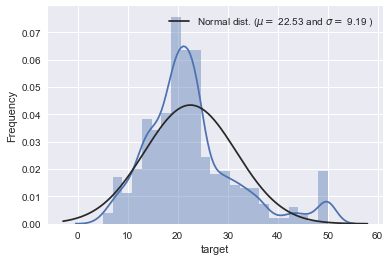

In [194]:
sns.distplot(boston_tg['target'], fit=norm)
avr, sigma = norm.fit(boston_tg['target'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avr, sigma)], loc='best')
plt.ylabel('Frequency')
print('avr={:2f}, sigma={:.2f}'.format(avr,sigma))
print('skew={}'.format(skew(np.log1p(boston_tg['target']))))

In [195]:
boston_tg_nm = np.log1p(boston_tg)

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


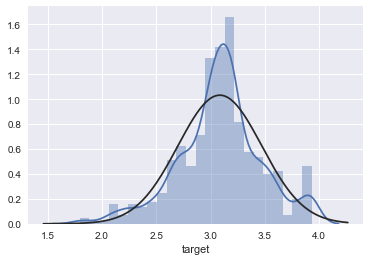

In [196]:
sns.distplot(boston_tg_nm['target'], fit=norm);

### 目的変数をy_trainと呼びます

In [197]:
#[]で中の数値だけをArrayにした
y_train = boston_tg_nm["target"]

In [198]:
y_train.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: target, dtype: float64

### 説明変数を'LSTAT'のみにして、X_trainと呼びます

In [199]:
boston = pd.read_csv("./boston.csv")

In [200]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [201]:
X_train = boston["LSTAT"]

In [202]:
X_train.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

## 学習：単回帰


### 単回帰と重回帰についての違いを記述せよ

単回帰分析というのは1つの目的変数を1つの説明変数で予測するものである事に対し、重回帰分析は1つの目的変数を複数の説明変数で予測しようというものです。

### データセット分割（単回帰分析）
ここからは学習です。作業のためのデータセットを作ります。

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [204]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
lin_1d = linear_model.LinearRegression()

# 学習させます
lin_1d.fit(X_train[:,None],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [205]:
# 決定関数
score_1d = lin_1d.score(X_test[:,None],y_test)
score_1d


0.61180280940359655

### 決定係数とは何か記述せよ


決定係数（けっていけいすう、英: coefficient of determination）は、説明変数が目的変数のどれくらいを説明できるかを表す値です。寄与率と呼ばれることもあります。標本値から求めた回帰方程式のあてはまりの良さの尺度として利用されます。

In [206]:
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.61


### 決定係数をいかなる場合も信じても良いか記述せよ


「Dive Into Code在校生、卒業生全員から、ランダムに10人選んでアンケートを行う」ことを考えてみましょう。
このアンケートの結果にもとづいて回帰分析を行い、そこで得られた回帰係数をもとに決定係数を出したとします。
しかしながら、ここで求められた回帰係数はあくまで「たまたま選ばれた10人」に対して最も予測が当たるように求められたものです。
Dive Into Codeの在校生、卒業生全員を対象に「たまたま選ばれた10人」に最適化された結果を適用すると、一般に予測が悪くなる可能性があります。

決定係数は「たまたま選ばれた10人」への予測の当てはまりだけを見ている指標です。
そのためこれを「在校生、卒業生全員」とした決定係数と考えようとすると、
予測の当てはまりの良さを課題に見積もっていることになり不適切ということがあり得ます。

こうした問題に対処し、あくまで「在校生、卒業生全員」とした予測値の当てはまりを評価できるよう決定係数の値を修正した
「自由度調整済み決定係数」という考え方があります。
値の修正にはサンプル数と説明変数の個数から求められる「自由度」という数字を使っているため、この名前がつけられています。

我々が明らかにしたいのは「たまたま選ばれた10人」の性質よりも、
「在校生、卒業生全員」（あるいはマーケティングの文脈なら「ターゲットとする顧客セグメント全体」など）の性質であることがほとんどでしょう。
その文脈に照らし合わせると、自由度調整済み決定係数の方が決定係数より好ましい性質を持っていると言えます。
そのため決定係数と自由度調整済み決定係数の両方が出力されている場合は、自由度調整済み決定係数の方を参照するなどが必要となります。

つまりは、分析の目的が「ある変数の値を予測したい」の場合には適切な指標ですが、「雨が降った日数がコンビニの月間の売上に影響があるかどうか知りたい」のように、
ある変数の影響の有無が主眼であり予測は重視しない場合には、決定係数に注目するより他に注目すべきものがあるということになります。
この場合には「雨が降った日数」という説明変数の回帰係数や、その係数に対する検定の結果（有意かどうか）にまず注目すべきというようなことになります。



## 2,3,4次式の回帰


### 多項式回帰：2次、3次、4次のへの準備

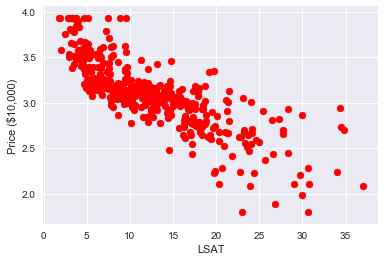

In [259]:
plt.scatter(X_train, y_train, color='r')


#グラフの軸名
plt.xlabel('LSAT')
plt.ylabel('Price ($10,000)')

上記を実行すると以下のようなグラフが得られる。 見た感じ直線がデータに上手くフィットしていないようだ。

### 多項式（2次、3次、4次）を当てた時

In [216]:
##  必要なデータを準備します。
# bostonデータ読み込み
from sklearn import datasets
boston = datasets.load_boston()

# 1から、bostonデータをPandasに代入してデータ確認
import pandas as pd
# 説明変数(data)
boston_df2 = pd.DataFrame(boston.data, columns=boston.feature_names) 
# 目的変数(target)追加
boston_df2['PRICE'] = boston.target 
boston_df2.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### LSTATとPRICEをとる

In [224]:
X_train2 = boston_df2.loc[:,['LSTAT','PRICE']]
X_train2.head()

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [243]:
X = np.array(X_train2['LSTAT']).T
y = np.array(X_train2['PRICE'])


In [249]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 1~4 次式をグラフで確認しておく

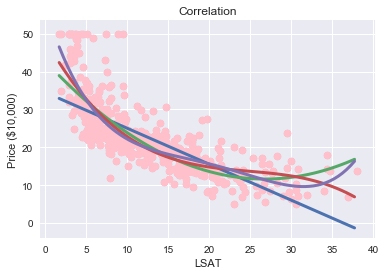

In [260]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

d = [1,2,3,4]

for deg in d:
    model = Pipeline([('poly', PolynomialFeatures(degree=deg)), ('linear', linear_model.LinearRegression())])
    model.fit(X[:,None], y)
    
    px = np.arange(X.min(), X.max(), 0.5)[:,np.newaxis]
    py = model.predict(px)
    
    plt.plot(px, py, linewidth=3, label='poly_deg %d'%deg)
    
    plt.scatter(X, y, color='pink')

    #グラフの軸名
    plt.title('Correlation')
    plt.xlabel('LSAT')
    plt.ylabel('Price ($10,000)')

In [261]:
# Dividing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### 2次、3次、4次の決定係数は

In [263]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
lin_2d = linear_model.LinearRegression()
lin_3d = linear_model.LinearRegression()
lin_4d = linear_model.LinearRegression()

degree_2 = PolynomialFeatures(degree = 2)
degree_3 = PolynomialFeatures(degree = 3)
degree_4 = PolynomialFeatures(degree = 4)

x_train_2 = degree_2.fit_transform(X_train[:,None])
x_train_3 = degree_3.fit_transform(X_train[:,None])
x_train_4 = degree_4.fit_transform(X_train[:,None])

lin_2d.fit(x_train_2,y_train)
lin_3d.fit(x_train_3,y_train)
lin_4d.fit(x_train_4,y_train)

x_test_2 = degree_2.fit_transform(X_test[:,None])
x_test_3 = degree_3.fit_transform(X_test[:,None])
x_test_4 = degree_4.fit_transform(X_test[:,None])

score_2d = lin_2d.score(x_test_2,y_test)
score_3d = lin_3d.score(x_test_3,y_test)
score_4d = lin_4d.score(x_test_4,y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


## 次数が大きくなるとどうなるか記述せよ
- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
- 次数を増やすとどのようなメリットが考えられるか
- 次数を増やすとどのようなデメリットが考えられるか

### 決定係数の次数が増えた際の数式
 1次式　　
$$ y = ax + b $$ 
 2次式　 
$$ y = ax^2 + bx + c $$ 
 3次式　
$$ y = ax^3 + bx^2 + cx + d $$ 

のように増えて行く、

よって一般式で表すと、 
$$ \sum_{i = 0}^{n}\ c_ix^i $$ 
＊ciは定数とする

メリットとして次数を増やす事により表現力が高くなるので、１次式より誤差が小さくなります。
またデメリットは、次数を増やしすぎてしまうと過学習を起こしてしまい汎用性の無いモデルになってしまうこともあります。


## 重回帰


### 他の特徴量も取り入れましょう

上記までは、LSTATのみを使用しましたが、他の特徴量も使用して学習させましょう。重回帰を使用して、0.71以上の決定係数出れば合格です。
- ヒント
すべての特徴量を使用せず、相関が強い特徴量のみを使用してみましょう。
次数を変更してみましょう。

In [264]:
# bostonデータ読み込み
from sklearn import datasets
boston = datasets.load_boston()

# 1から、bostonデータをPandasに代入してデータ確認
import pandas as pd
# 説明変数(data)
boston_df3 = pd.DataFrame(boston.data, columns=boston.feature_names) 
# 目的変数(target)追加
boston_df3['PRICE'] = boston.target 
boston_df3.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### ヒートマップで見てみましょう

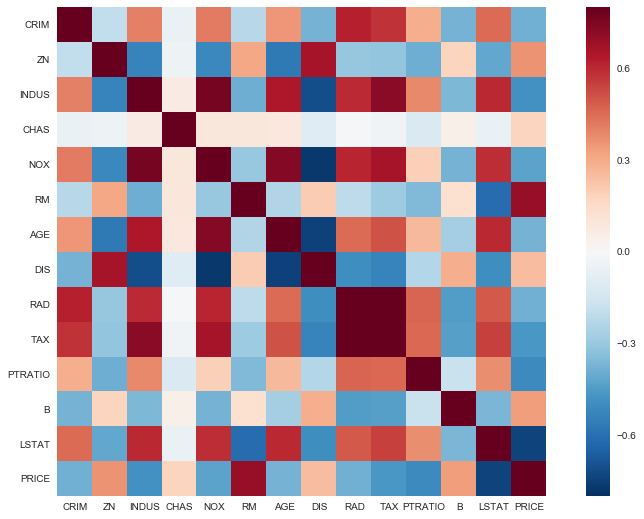

In [268]:
#Correlation Matrix
corrmat = boston_df3.corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### 近寄ってみましょう

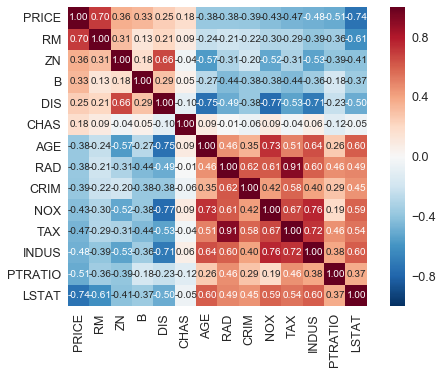

In [272]:
#Show a Zoom HEAT MAPPING
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(boston_df3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 相関の高いものを選ぶ

In [327]:
A = ['LSTAT', 'RM', 'PTRATIO']
X_train3 = boston_df3.loc[:,A]
X_train3.head()

,LSTAT,RM,PTRATIO
0,4.98,6.575,15.3
1,9.14,6.421,17.8
2,4.03,7.185,17.8
3,2.94,6.998,18.7
4,5.33,7.147,18.7


### Yも変数にする

In [328]:
y_train3 = boston_df3['PRICE']
y_train3_nm = np.log1p(y_train3)
y_train3_nm.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: PRICE, dtype: float64

#### 分割します

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train3, y_train3, test_size=0.2)


### 重回帰分析

In [330]:
# モデル作成
from sklearn import linear_model
clf = linear_model.LinearRegression() 

# 洗濯した特徴量だけで学習
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [331]:
# 重回帰式の切片
print('intercept b = ', clf.intercept_)

intercept b =  20.4360860987


In [332]:
# 重回帰式の係数
import pandas as pd
coef_df = pd.DataFrame(boston.feature_names, columns=['Feature'])
coef_df['coefficient'] = pd.Series(clf.coef_)
coef_df

,Feature,coefficient
0,CRIM,-0.607697
1,ZN,4.251286
2,INDUS,-0.914312
3,CHAS,NaN
4,NOX,NaN
5,RM,NaN
6,AGE,NaN
7,DIS,NaN
8,RAD,NaN
9,TAX,NaN


In [333]:
# MSE（平均二乗誤差 Mean Squared Error、小さいほどモデルの誤差が少ない）
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE = ', mse)

MSE =  16.4331925494


In [334]:
# R^2の確認（モデルの当てはまり良さの指標、最も良い場合1）  
print('R^2 = ', clf.score(X_test, y_test))

R^2 =  0.757380060582


## 重回帰について記述せよ

以下の観点をすべて含めて記述しましょう。
- 説明変数を増やすことでどのようなメリットがあるか
- 説明変数を増やすことでどのようなデメリットがあるか
重回帰分析は1つの目的変数を複数の説明変数で予測しようというものです。
メリットは、説明変数を一つしか用いない単回帰分析に比べて予想の精度が上がることが多いことです。
一方デメリットは、説明変数同士の相関係数が高いものを入れると精度が落ちるなどがあります。疑似相関には十分注意しなければなりません。
